In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
df = pd.read_csv('youtube-top-100-songs-2025.csv')

In [14]:
df.head()

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


In [15]:
df.isnull().mean()*100

title                      0.0
fulltitle                  0.0
description                0.0
view_count                 0.0
categories                 0.0
tags                      15.0
duration                   0.0
duration_string            0.0
live_status                0.0
thumbnail                  0.0
channel                    0.0
channel_url                0.0
channel_follower_count     0.0
dtype: float64

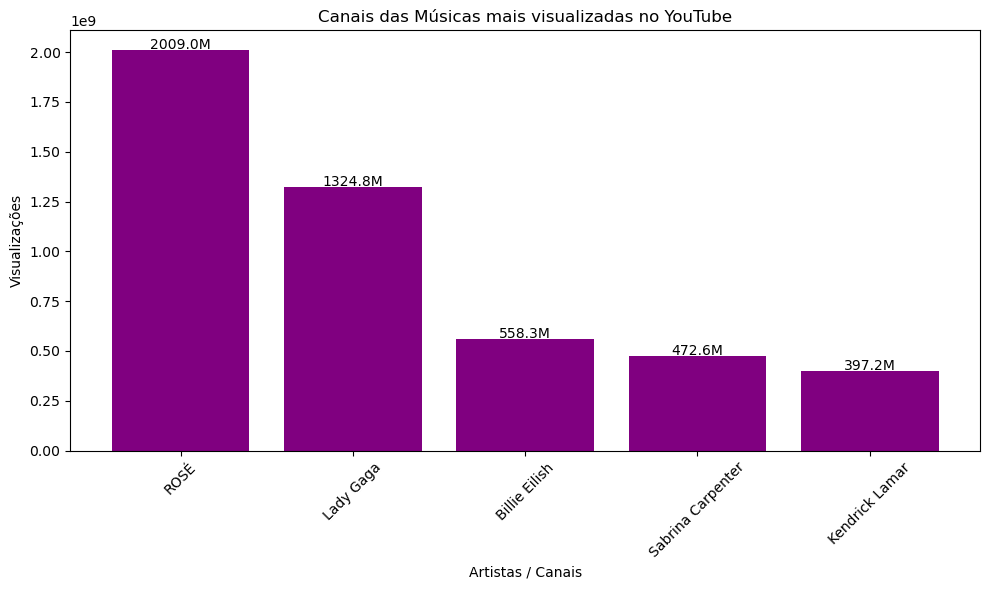

In [ ]:
#Mostra os 5 artistas / canais donos das musicas do top 100 mais vizualizadas em 2025
df_musicas = df['channel']
df_vizus = df['view_count']

df_sorted = df.sort_values(by='view_count', ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['channel'], df_sorted['view_count'], color='purple')
plt.title('Canais das Músicas mais visualizadas no YouTube')
plt.xlabel('Artistas / Canais')
plt.ylabel('Visualizações')
plt.xticks(rotation=45)

for i, valor in enumerate(df_sorted['view_count']):
    plt.text(i, valor + 5_000_000, f'{valor/1e6:.1f}M', ha='center')

plt.tight_layout()
plt.show()

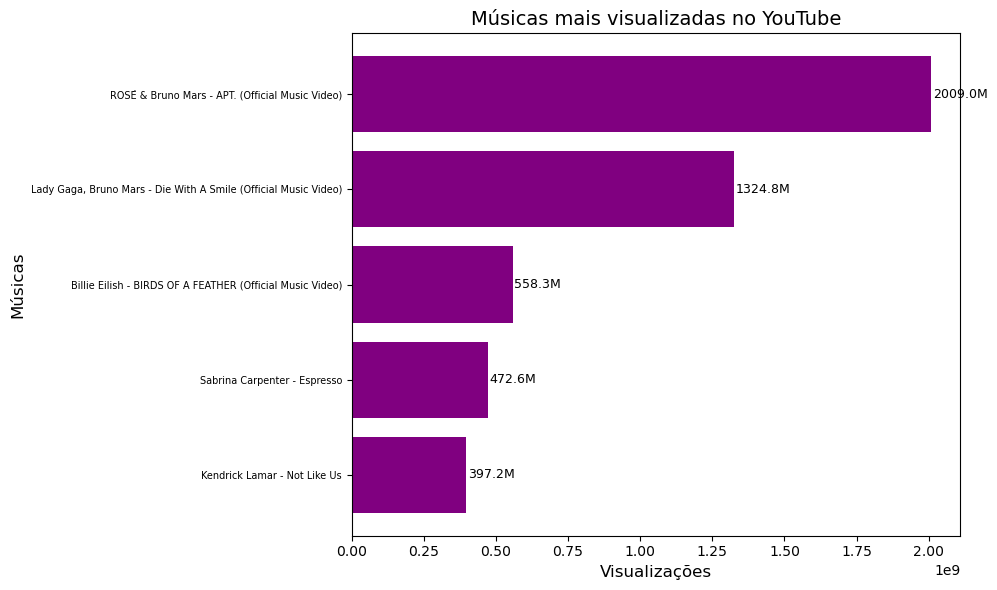

In [ ]:
#Mostra as 5 musicas do top 100 musicas mais vizualizadas em 2025
df_sorted = df.sort_values(by='view_count', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(df_sorted['title'], df_sorted['view_count'], color='purple')

plt.title('Músicas mais visualizadas no YouTube', fontsize=14)
plt.xlabel('Visualizações', fontsize=12)
plt.ylabel('Músicas', fontsize=12)

plt.yticks(fontsize=7)

plt.gca().invert_yaxis()

for i, (valor, nome) in enumerate(zip(df_sorted['view_count'], df_sorted['title'])):
    plt.text(valor + 5_000_000, i, f'{valor/1e6:.1f}M', va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [62]:
#Demostração utilizando a biblioteca Plotly
import plotly.express as px

figura = px.bar(
    df_sorted,
    x='channel',
    y='view_count',
    orientation='v',  
    title='Top 5 Canais com as Musicas Mais Visualizadas no YouTube',
    labels={'Quantidade de Wiews ': 'Visualizações', 'Canais ': 'Canal'},
    text='view_count',  
    color='view_count',  
    color_continuous_scale='Purples'
)

figura.update_layout(
    yaxis={'categoryorder':'total ascending'},  
    xaxis_title='Canais',
    yaxis_title='Visualizações',
    title_x=0.5, 
    font=dict(size=12)
)

fig.show()